In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split

np.random.seed(4747)

In [8]:
# Read in the two csvs
h = pd.read_csv('harry.csv').drop('Unnamed: 0', 1)
m = pd.read_csv('me.csv').drop('Unnamed: 0', 1)

# Let's start with classification!

In [16]:
# Create the labels
h['label'] = 'harry'
m['label'] = 'me'

# Merge the two datasets
df = pd.concat([_,_])

df.shape

(2635, 14)

In [17]:
# Look at value counts of 'label'
df['label'].value_counts()

me       2017
harry     618
Name: label, dtype: int64

In [20]:
# Define the predictors (use list comprehension!, not in ['song_title', 'artist', 'label']) and target
predictors = 
target = 

print(predictors)

['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']


In [23]:
# Define X_data and y_data as the "values" of df
X_data = 
y_data = 

In [24]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = ___,
                                                    random_state = 47)

In [27]:
# One tuning parameter
max_depth = ___

# Define clf
clf = tree.DecisionTreeClassifier(max_depth = max_depth)

# Fit classifier
clf.fit(__, __)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
# Look at feature importance
{c:str(round(v,4)) for c,v in zip(predictors, clf.feature_importances_)}

{'acousticness': '0.1386',
 'danceability': '0.0936',
 'energy': '0.0646',
 'instrumentalness': '0.1093',
 'key': '0.0389',
 'liveness': '0.0721',
 'loudness': '0.0757',
 'mode': '0.0086',
 'speechiness': '0.186',
 'tempo': '0.1346',
 'valence': '0.0781'}

/Users/zihaoxu/ENTER/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


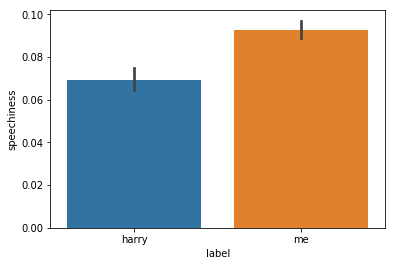

In [73]:
# Let's take a look!
sns.barplot(data = df, x = 'label', y = 'speechiness')

In [29]:
# Prediction!
preds = clf.predict(__)
print("Accuracy is:", sum(_____))

Text(0.5,15,'Predicted label')

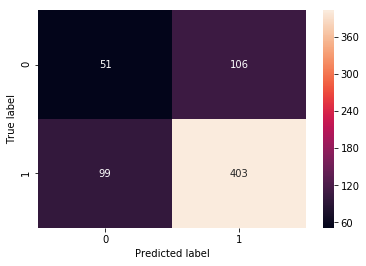

In [68]:
# Look at the confusion matrix (test, pred)
conf_mat = confusion_matrix(y_test, preds)
sns.heatmap(conf_mat, annot = True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
# Normalized conf_mat
conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
conf_mat

array([[0.32484076, 0.67515924],
       [0.19721116, 0.80278884]])

Text(0.5,15,'Predicted label')

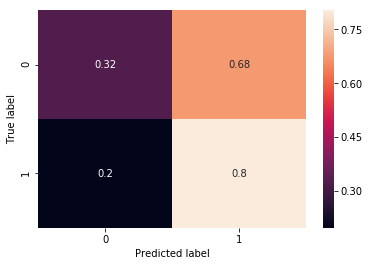

In [70]:
sns.heatmap(conf_mat, annot = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Now let's do a simple regression

In [82]:
# Define the predictors and target
predictors = [c for c in list(df) if c not in ['song_title', 'artist', 'loudness', 'label']]
target = 'loudness'

print(predictors)

['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'mode', 'speechiness', 'tempo', 'valence']


In [85]:
# Define X_data and y_data
X_data = 
y_data = 

In [86]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = 0.25,
                                                    random_state = 47)

In [87]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
preds = regr.predict(X_test)

/Users/zihaoxu/ENTER/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [92]:
# Look at MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, preds))

Mean squared error: 4.70


(-35, 0)

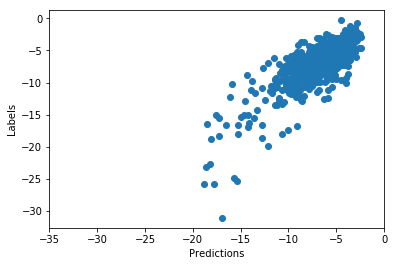

In [94]:
# Plot predicted against actual
plt.scatter(preds, y_test)
plt.xlabel('Predictions')
plt.ylabel('Labels')
plt.xlim(-35, 0)
plt.xlim(-35, 0)

/Users/zihaoxu/ENTER/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


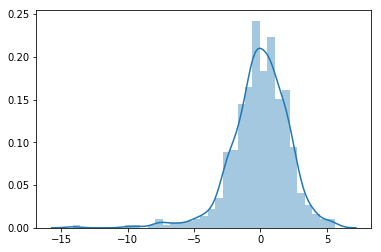

In [93]:
# Look at residuals
sns.distplot(y_test - preds)